# Wstęp
W ramach tego projektu zostanie zbadane, czy istnieje silna korelacja pomiędzy wynikiem gospodarczym danego kraju a średnią długością życia jego obywateli.

Celem jest przygotowanie danych, a następnie ich analiza za pomocą wykresów oraz próba wyjaśnienia wniosków z badania.

Oto kilka pytań, na które ten projekt będzie starał się odpowiedzieć:
+ Czy średnia długość życia wzrosła z biegiem czasu w sześciu badanych narodach?
+ Czy PKB wzrósło z biegiem czasu w sześciu badanych krajach?
+ Czy istnieje korelacja między PKB a długością życia w danym kraju?
+ Jaka jest średnia długość życia w tych narodach?
+ Jaki jest rozkład średniej długości życia?

**Źródła Danych**

- Źródło PKB: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD), dane rachunków narodowych, oraz pliki danych rachunków narodowych OECD.
- Źródło oczekiwana długość życia: [World Health Organization](http://apps.who.int/gho/data/node.main.688)    



# Import modułów 
Najpierw trzeba zaimportować moduły Pythona używane w projekcie

In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Załadowanie danych
W celu znalezienia powiązań pomiędzy PKB a średnią długością życia wczytano zbiory danych do DataFrame, aby można było je zwizualizować.

Tutaj plik all_data.csv zostanie wczytany do DataFrame o nazwie df, po czym nastąpi szybka inspekcja danych przy użyciu komendy .head() w celu sprawdzenia jej zawartości.

In [7]:
df = pd.read_csv('all_data.csv')
print(df.head(5))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


Następnie wykonywane jest sprawdzenie kształtu i rozmiaru df. Z czego wynika że jest 96 obserwacji((wierszy)) i 4 kolumny.

In [6]:
df.shape

(96, 4)

# Badanie danych

Po pierwsze trzeba dowiedzieć się więcej o badanych krajach. Jest ich 6 i są to: Chile, Chiny, Niemcy, Meksyk, USA i Zimbabwe.

In [7]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Kolejnym krokiem jest sprawdzenie, które lata są reprezentowane w danych, a są to lata 2000-2015.

In [8]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


#### Zmiana nazw kolumn

Przeglądając nazwy kolumn można dostrzeć nieprawidłowości w niektórych z nich. Na przykład nazwy dwóch pierwszych kolumn mają po jednych słowie a trzecia składa się aż z 5. Kolumna ` Life expectancy at birth (years)` jest opisowa, co przyda się przy oznaczaniu osi, ale jej długość sprawiałaby że było by to uciążliwe przy samym kodowaniu. Przy użyciu funkcji remane zmieniamy nazwe tej kolumny na `LEABY`.  

In [10]:
df = df.rename({'Life expectancy at birth (years)': 'LEABY'}, axis = 'columns')
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# Eksploracja Danych

Eksploracja danych za pomocą wykresów może być czasem dużo bardzo efektywna, poniżej pokazano rozkład PKB. Jak można zauważyć rozkład PKB jest bardzo prawoskośny, czyli większość wartości znajduje się po lewej stronie. Ten typ rozkładu można określić jako Rozkład Pareta

C:\Users\adima\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adima\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


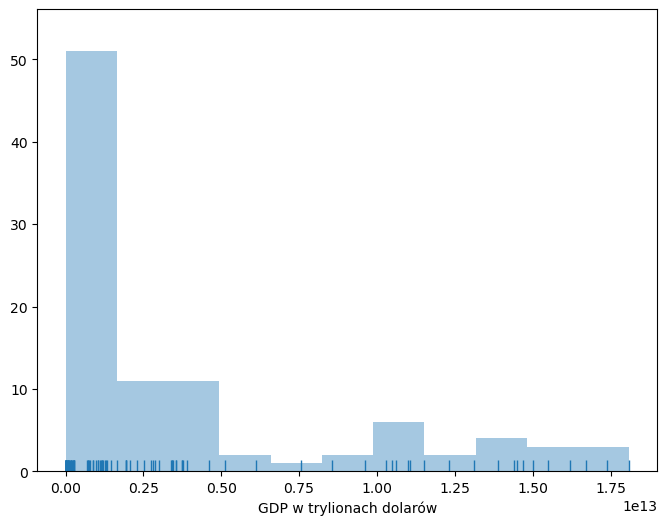

In [9]:
plt.figure(figsize = (8,6))
sns.distplot(df.GDP, rug = True, kde = False)
plt.xlabel('GDP w trylionach dolarów');

Następnie zbadamy rozkład `LEABY`. Rozkład `LEABY` jest Z kolei bardzo lewoskośny, gdzie większość wartości znajduje się po prawej stronie. Jest to praktycznie odwrotność tego, co zaobserwowano w kolumnie PKB.

C:\Users\adima\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\adima\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


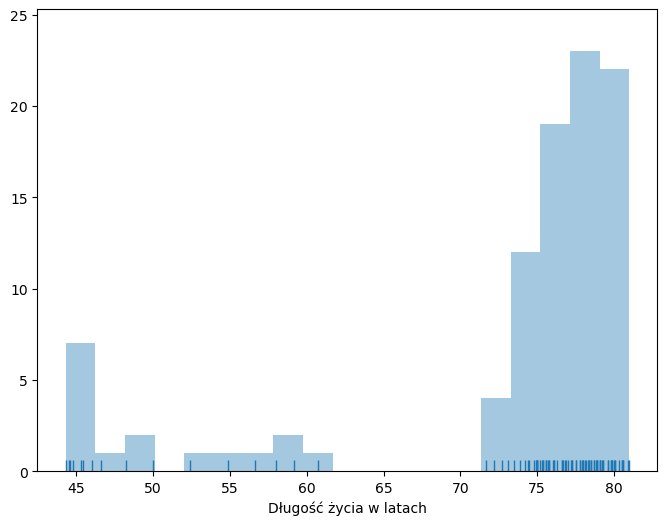

In [14]:
plt.figure(figsize = (8,6))
sns.distplot(df.LEABY, rug = True, kde = False)
plt.xlabel('Długość życia w latach');

Poprzednie wykresy nie rozbijały danych na kraje, więc następnym zadaniem będzie znalezienie średniej `LEABY` i `PKB` w podziale na kraje.

In [16]:
df.Means = df.drop('Year', axis = 1).groupby('Country').mean().reset_index()

C:\Users\adima\AppData\Local\Temp\ipykernel_14116\574087517.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Means = df.drop('Year', axis = 1).groupby('Country').mean().reset_index()


In [18]:
df.Means

,Country,LEABY,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Teraz, gdy podzieliliśmy dane według krajów, utworzono średnie wartości dla `LEABY` i `PKB` , poniżej stworzono wykresy słupkowe pokazujące średnie wartości dla każdej zmiennej.

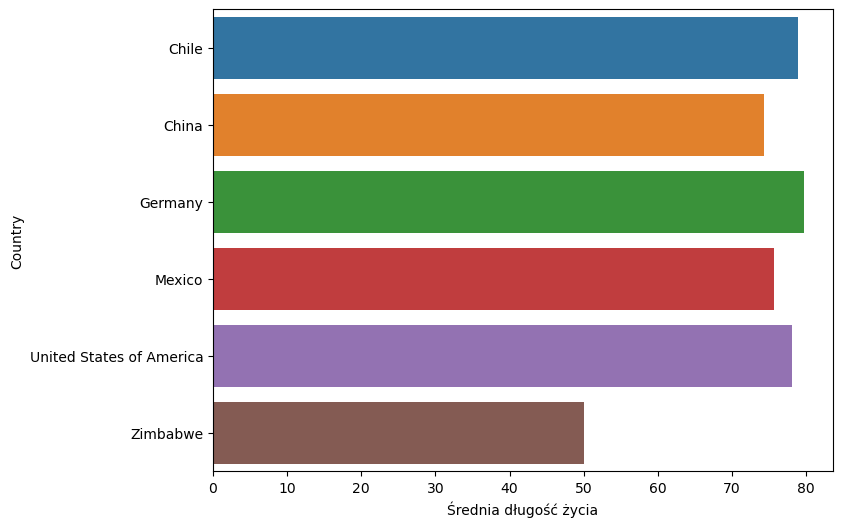

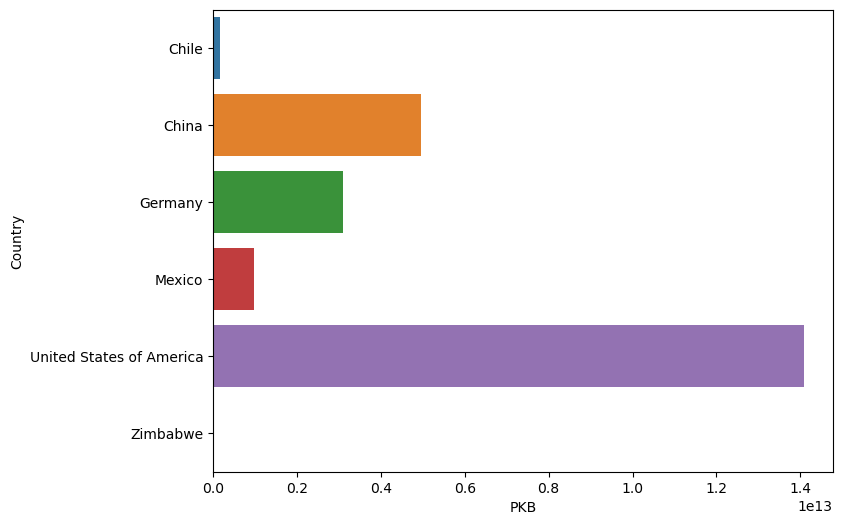

In [28]:
plt.figure(figsize =(8,6))
sns.barplot(x = 'LEABY', y = 'Country', data = df.Means)
plt.xlabel('Średnia długość życia');

plt.figure(figsize =(8,6))
sns.barplot(x = 'GDP', y = 'Country', data = df.Means)
plt.xlabel('PKB');

Pierwszy wykres to długość życia i wszystkie kraje z wyjątkiem Zimbabwe mają wartości większe od 70. To prawdopodobnie wyjaśnia skośność rozkładu.

W przypadku średniego PKB według kraju widać że USA ma znacznie wyższą wartość w porównaniu z resztą krajów. W porównaniu z ogromnym wynikiem USA Zimbabwe jest tak małe że nie jest nawet widoczne na tym wykresie, a Chile ledwo widoczne. Chiny, Niemcy i Meksyk wydają się mieć stosunkowo podobne wyniki

# Wykresy skrzypcowe

Innym sposobem na porównanie danych jest wizualizacja rozkładów każdego z nich i szukanie wzorów w kształtach.

Wykres skrzypcowy jest popularnym wyborem, ponieważ może pokazać kształt dystrybucji w przeciwieństwie do wykresu pudełkowego. Poniżej, kraj jest na osi x, a  `PKB` i `LEABY` są na osi y.

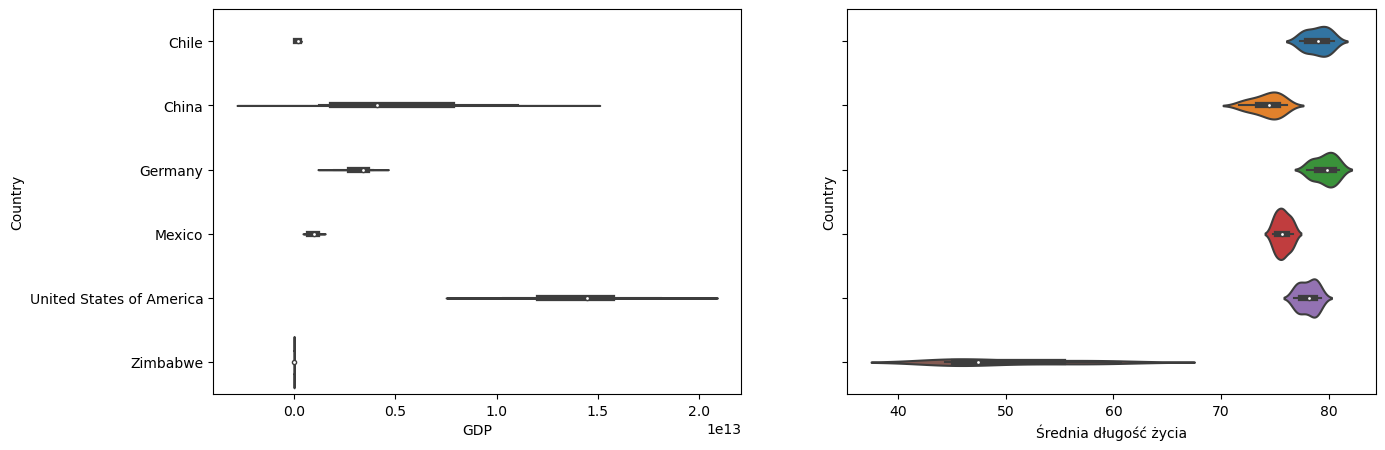

In [12]:
fig, axes = plt.subplots(1,2, sharey = True, figsize =(15,5))
axes[0] = sns.violinplot(ax = axes[0], x = df.GDP, y = df.Country)
axes[0].set_xlabel('GDP')
axes[1] = sns.violinplot(ax = axes[1], x = df.LEABY, y =df.Country)
axes[1].set_xlabel('Średnia długość życia');

Na wykresie `PKB` po lewej stronie Chiny i USA mają stosunkowo szeroki zakres, podczas gdy Zimbabwe, Chile i Meksyk mają krótsze zakresy.

Na wykresie `LEABY` wiele krajów ma krótsze zakresy, z wyjątkiem Zimbabwe, które ma zakres od  30 do 60.

#### Wykres roju
Inną nowszą metodą pokazywania rozkładów jest wykres roju, który można wykorzystać jako uzupełnienie wykresów skrzynkowych i skrzypcowych. Najpierw pokazano jest samodzielny wykres roju, a następnie nałożono go na wykres skrzypcowy. Wykresy roju są przydatne, ponieważ pokazują gęstość kropek wokół wartości, a także rozkład za pomocą ksztuałtu.

C:\Users\adima\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


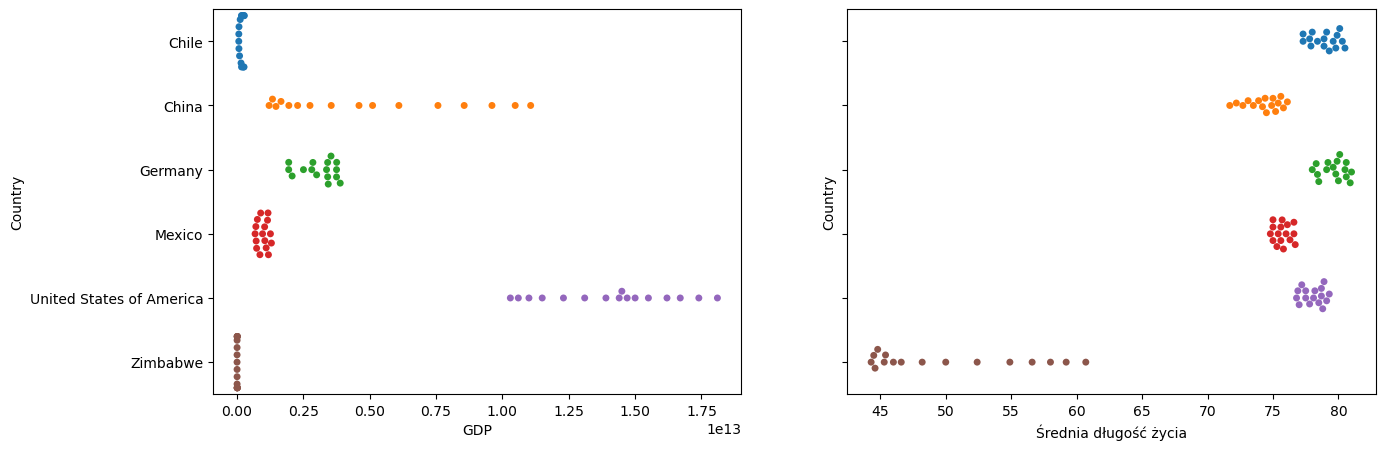

In [11]:
fig, axes = plt.subplots(1,2, sharey = True, figsize = (15,5))
axes[0] = sns.swarmplot(ax = axes[0], x = df.GDP, y = df.Country)
axes[0].set_xlabel('GDP')
axes[1] = sns.swarmplot(ax = axes[1], x = df.LEABY, y =df.Country)
axes[1].set_xlabel('Średnia długość życia');

W przypadku wykresu `PKB` po lewej stronie Chile i Zimbabwe mają pionową linię kropek, które ilustrują liczbę punktów danych, które mieszczą się wokół ich wartości.

C:\Users\adima\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\adima\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


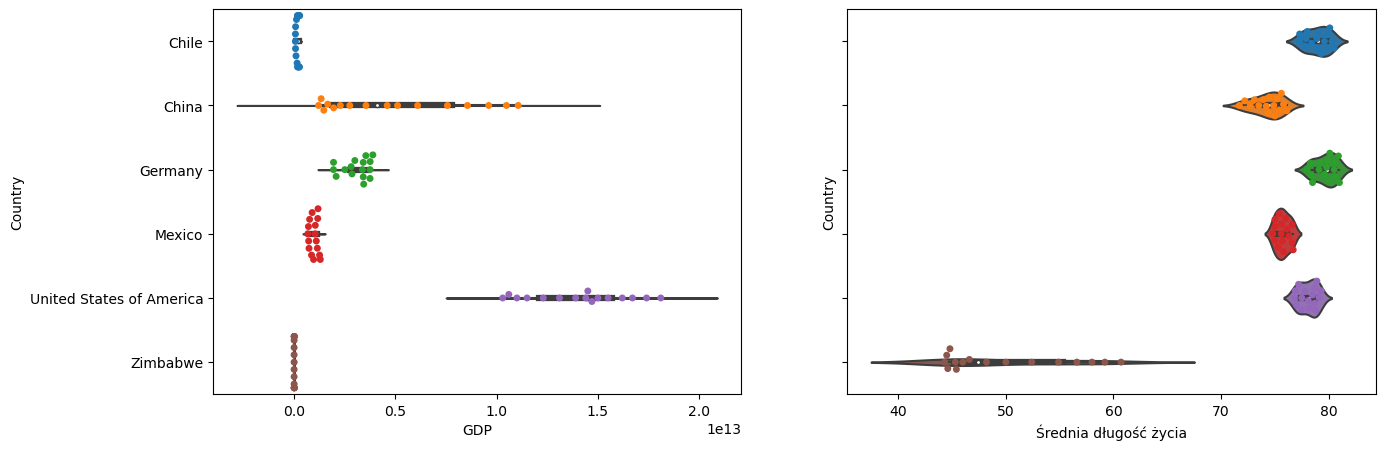

In [13]:
fig, axes = plt.subplots(1,2, sharey = True, figsize =(15,5))
axes[0] = sns.violinplot(ax = axes[0], x = df.GDP, y = df.Country)
axes[0] = sns.swarmplot(ax = axes[0], x = df.GDP, y = df.Country)
axes[0].set_xlabel('GDP')
axes[1] = sns.violinplot(ax = axes[1], x = df.LEABY, y =df.Country)
axes[1] = sns.swarmplot(ax = axes[1], x = df.LEABY, y =df.Country)
axes[1].set_xlabel('Średnia długość życia');

# Wykres Liniowy
Następnie dane będą badać `PKB` i `LEABY` na przestrzeni lat za pomocą wykresów liniowych. Poniżej kraje są oddzielone kolorami i widać, że Stany Zjednoczone i Chiny odnotowały znaczny wzrost w latach 2000-2015. Chiny przeszły od mniej niż ćwierć biliona dolarów do jednego biliona dolarów w tym przedziale czasowym. Pozostałe kraje nie odnotowały wzrostów na taką skalę.

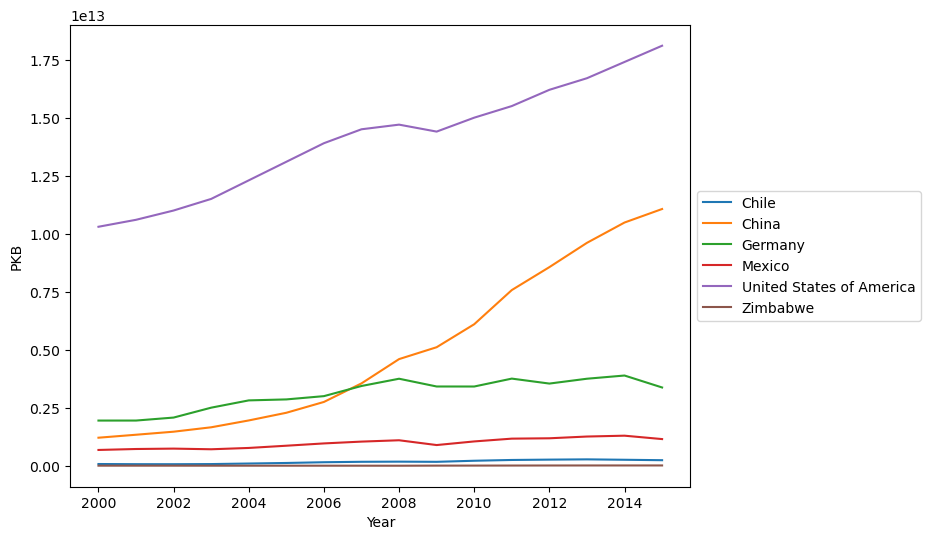

In [17]:
plt.figure(figsize = (8,6))
sns.lineplot(x = df.Year, y = df.GDP, hue = df.Country)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1)
plt.ylabel('PKB');


          

Innym aspektem, któremu poświęcono więcej uwagi, było rozbicie danych na wykresy liniowe według krajów. Na poszczególnych wykresach każdy kraj ma swoją oś y, co ułatwia porównanie kształtu ich PKB na przestrzeni lat bez tej samej skali. Ta metoda ułatwia stwierdzenie, że wszystkie kraje odnotowały wzrosty. Na powyższym wykresie wzrost PKB drugiego kraju wyglądał skromnie w porównaniu z Chinami i USA, ale wszystkie kraje odnotowały wzrost od roku 2000.

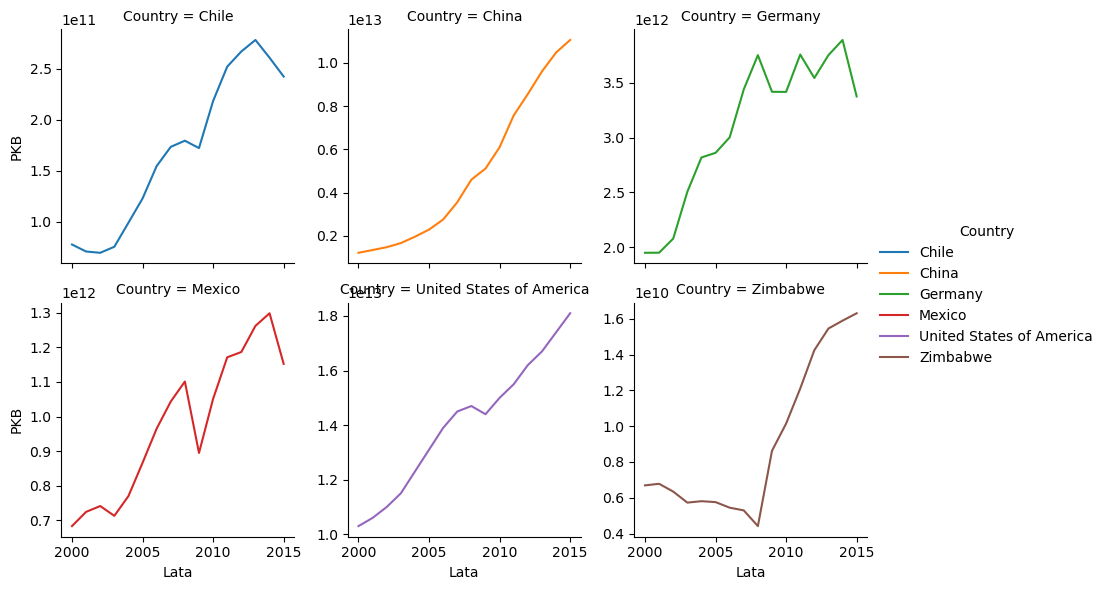

In [23]:
graphGDP = sns.FacetGrid(df, col= 'Country', col_wrap = 3, hue = 'Country', sharey = False,)
graphGDP = (graphGDP.map(sns.lineplot, 'Year', 'GDP').add_legend().set_axis_labels('Lata', 'PKB'))
graphGDP;           

Poniższy wykres pokazuje oczekiwaną długość życia na przestrzeni lat. Wykres pokazuje, że każdy kraj wydłużał swoją średnią długość życia, ale Zimbabwe odnotowało największy wzrost po niewielkim spadku około 2004 roku.

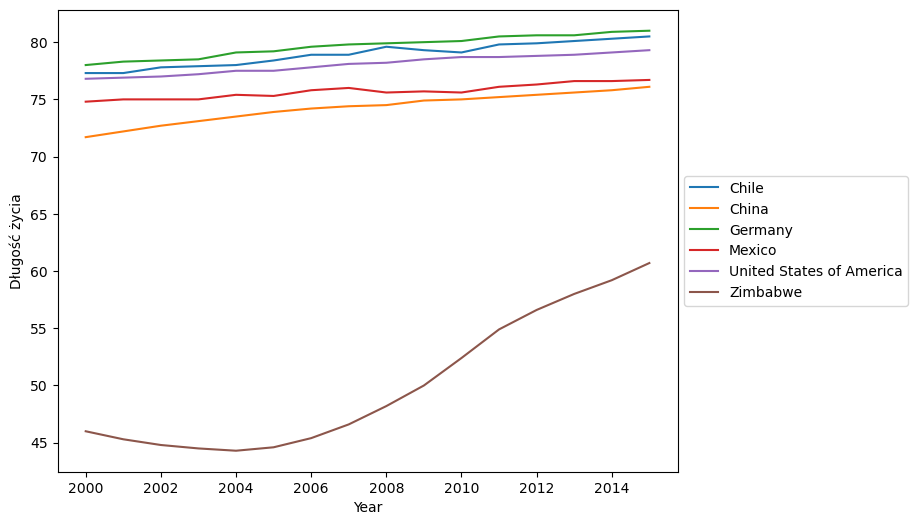

In [24]:
plt.figure(figsize = (8,6))
sns.lineplot(x = df.Year, y = df.LEABY, hue = df.Country)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 1)
plt.ylabel('Długość życia');

Podobnie jak poprzedni podział PKB według krajów, poniższy wykres przedstawia średnią długość życia również podizeloną na kraje. Oczywiste jest, że Chile i Meksyk miały spadki oczekiwanej długości życia mniej więcej w tym samym czasie, czego powody można byłoby zbadać w późniejszych badaniach. Ten rodzaj wizualizacji danych okazuje się przydatny, ponieważ wiele z tych niuansów zostałoby utraconych, gdy oś y była wspólna dla wszystkich krajów. Również liniowe zmiany w rzeczywistości nie były tak płynne dla niektórych krajów jak mogło się wydawać na wspólnym wykresie

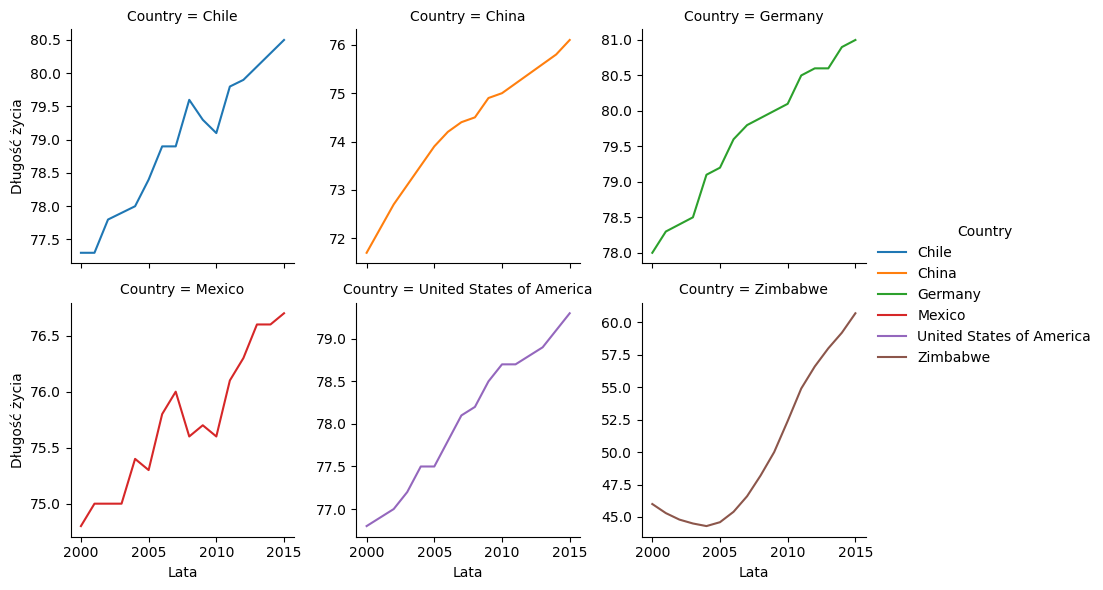

In [26]:
graphGDP = sns.FacetGrid(df, col= 'Country', col_wrap = 3, hue = 'Country', sharey = False,)
graphGDP = (graphGDP.map(sns.lineplot, 'Year', 'LEABY').add_legend().set_axis_labels('Lata', 'Długość życia'))
graphGDP; 

# Wykres punktowy
Następne dwa wykresy zbadają związek między PKB a LEABY. Na poniższym wykresie PKB Zimbabwe, podobnie jak na poprzednich wykresach, pozostaje na niezmienionym poziomie, podczas gdy średnia długość życia rośnie. W przypadku innych krajów wydaje się, że wraz ze wzrostem PKB rośnie oczekiwana długość życia. Wydaje się, że Stany Zjednoczone i Chiny mają bardzo podobne nachylenia w relacji między PKB a oczekiwaną długością życia.

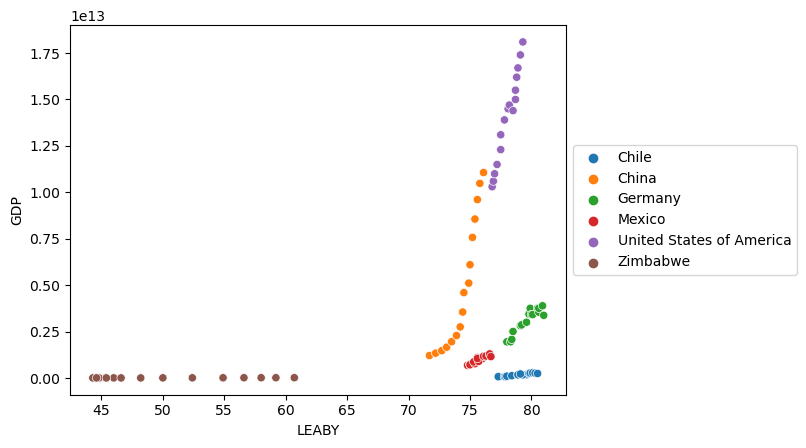

In [30]:
sns.scatterplot(x = df.LEABY, y= df.GDP, hue = df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

Podobnie jak poprzednie wykresy, kraje są podzielone na osobny wykres punktowy. Patrząc na poszczególne kraje, większość krajów, takich jak Stany Zjednoczone, Meksyk i Zimbabwe, ma liniowe zależności między PKB a średnią długością życia. Z drugiej strony Chiny mają nieco wykładniczą krzywą, a Chile wygląda nieco logarytmicznie. Ogólnie jednak można zaobserwować wzrost PKB i oczekiwanej długości życia, wykazując dodatnią korelację.

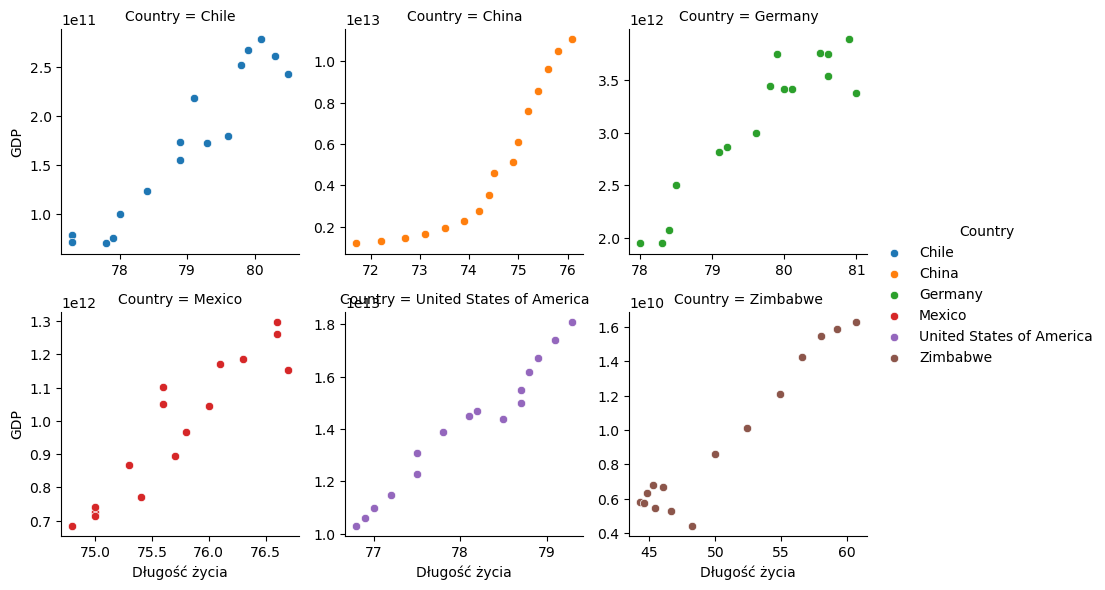

In [33]:
graphGDP = sns.FacetGrid(df, col= 'Country', col_wrap = 3, hue = 'Country', sharey = False, sharex = False)
graphGDP = (graphGDP.map(sns.scatterplot, 'LEABY', 'GDP').add_legend().set_axis_labels('Długość życia', 'GDP'))
graphGDP; 

# Wnioski
Mimo że dane były ograniczone i sprowadzały sie do tylko 96 wierszy i 4 kolumny, ten projekt był w stanie wykonać wiele przydatnych wizualizacji

W ramach projektu udało się również odpowiedzieć na niektóre pytania postawione na początku:

- Czy średnia długość życia wydłużyła się z biegiem czasu w sześciu narodach?
   - Tak, a Zimbabwe ma największy wzrost.
- Czy PKB wzrósł w czasie w sześciu krajach?
   - PKB wzrósł również we wszystkich krajach z naszej listy, zwłaszcza w Chinach.
- Czy istnieje korelacja między PKB a średnią długością życia w danym kraju?
   - Tak, istnieje pozytywna korelacja między PKB a oczekiwaną długością życia w krajach z naszej listy.
- Jaka jest średnia długość życia w tych krajach?
   - Średnia długość życia wynosiła od okolło 70 lat dla wszystkich krajów z wyjątkiem Zimbabwe, którego średnia wynosiła 50 lat.
- Jaki jest rozkład tej oczekiwanej długości życia?
    - Oczekiwana długość życia miała lewe przechylenie lub większość obserwacji była po prawej stronie.

# Dalsze badania
Celem następnych badań może być zbadanie, co wydarzyło się w Chinach w ciągu ostatnich 10 lat, co spowodowało tak drastyczny wzrost PKB.

